<a href="https://colab.research.google.com/github/Harsh-Burande/titanic_dataset/blob/main/TITANIC_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests as r
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from google.colab import drive
drive.mount('/content/drive')

titanic = pd.read_csv('/content/drive/MyDrive/Module2/titanic.csv')

Mounted at /content/drive


In [2]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# Exploring Data

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
titanic.shape

(891, 12)

In [7]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Filtering Data

In [8]:
titanic.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
886,False
887,False
888,False
889,False


In [9]:
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [10]:
# Dropped Cabin column
titanic.drop(columns = ['Cabin'], inplace = True)
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [11]:
# Filled missingn values with mean age
titanic['Age'].fillna(titanic['Age'].mean(), inplace = True)
titanic.isnull().sum()

<ipython-input-11-55a71524a6a2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].mean(), inplace = True)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [12]:
titanic['Age']

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


In [13]:
# Changed 1 --> Yes and 2 --> No
titanic['Survived_str'] = titanic['Survived'].apply(lambda x: 'Yes' if x==1 else 'No')
titanic['Survived_str']

,Survived_str
0,No
1,Yes
2,Yes
3,Yes
4,No
...,...
886,No
887,Yes
888,No
889,Yes


In [14]:
titanic['Embarked'].head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [15]:
titanic.shape, titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           891 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Embarked      889 non-null    object 
 11  Survived_str  891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


((891, 12), None)

In [16]:
# Changed age type form objeect to int
titanic['Age'] = titanic['Age'].apply(lambda x: int(x))
titanic['Age']

,Age
0,22
1,38
2,26
3,35
4,35
...,...
886,27
887,19
888,29
889,26


In [17]:
# Renamed Embarking city name
def alter(value):
  if value == 'C':
    return 'Cherbourg'
  elif value == 'Q':
    return 'Queenstown'
  elif value == 'S':
    return 'Southampton'
  else:
    return value

titanic['Embarked'] = titanic['Embarked'].apply(alter)
titanic['Embarked']

,Embarked
0,Southampton
1,Cherbourg
2,Southampton
3,Southampton
4,Southampton
...,...
886,Southampton
887,Southampton
888,Southampton
889,Cherbourg


In [18]:
# Dropped row with empty embark cell
titanic.dropna(subset = ['Embarked'], axis = 0 , inplace = True)

In [19]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   889 non-null    int64  
 1   Survived      889 non-null    int64  
 2   Pclass        889 non-null    int64  
 3   Name          889 non-null    object 
 4   Sex           889 non-null    object 
 5   Age           889 non-null    int64  
 6   SibSp         889 non-null    int64  
 7   Parch         889 non-null    int64  
 8   Ticket        889 non-null    object 
 9   Fare          889 non-null    float64
 10  Embarked      889 non-null    object 
 11  Survived_str  889 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 90.3+ KB


In [20]:
titanic.shape

(889, 12)

# Exploratory Data Analysis

In [21]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.498313,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.979638,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
titanic.describe(include = 'object')

,Name,Sex,Ticket,Embarked,Survived_str
count,889,889,889,889,889
unique,889,2,680,3,2
top,"Dooley, Mr. Patrick",male,CA. 2343,Southampton,No
freq,1,577,7,644,549


In [23]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   889 non-null    int64  
 1   Survived      889 non-null    int64  
 2   Pclass        889 non-null    int64  
 3   Name          889 non-null    object 
 4   Sex           889 non-null    object 
 5   Age           889 non-null    int64  
 6   SibSp         889 non-null    int64  
 7   Parch         889 non-null    int64  
 8   Ticket        889 non-null    object 
 9   Fare          889 non-null    float64
 10  Embarked      889 non-null    object 
 11  Survived_str  889 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 90.3+ KB


Sex
male      577
female    312
Name: count, dtype: int64


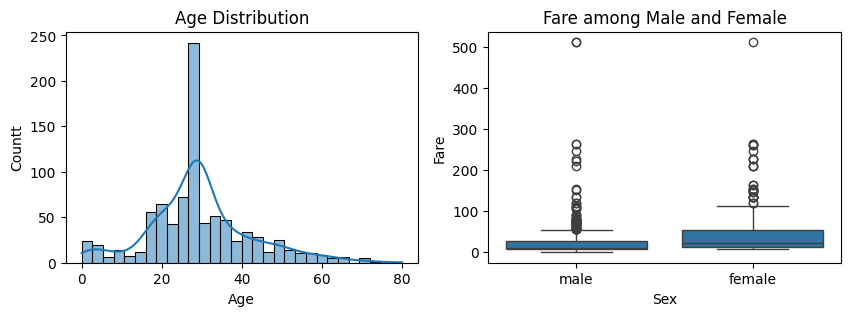

'\n1. AGE DISTRIBUTION\n   --> There were higher number of passengers of the age group between 17-37\n   --> Count of the passengers of the age group between 27-29 was the highest.\n\n2. FARE AMONG SEX\n   --> Male :- Collection of male fare was higher than female.\n   --> Female :- Collection of female fare was less than male.\n\n3. Onboard Sex\n   --> There were more males onboarded than females.\n'

In [24]:
sex_count = titanic['Sex'].value_counts()   # counting total number of Males and Females on the journey
print(sex_count)

fig, ax = plt.subplots(1, 2, figsize = (10, 3))
sns.histplot(titanic['Age'], kde = True, ax=ax[0])
ax[0].set_title("Age Distribution")
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Countt")

sns.boxplot(x = 'Sex', y = 'Fare', data = titanic, ax=ax[1])
ax[1].set_title("Fare among Male and Female")
ax[1].set_xlabel("Sex")
ax[1].set_ylabel("Fare")
plt.show()

'''
1. AGE DISTRIBUTION
   --> There were higher number of passengers of the age group between 17-37
   --> Count of the passengers of the age group between 27-29 was the highest.

2. FARE AMONG SEX
   --> Male :- Collection of male fare was higher than female.
   --> Female :- Collection of female fare was less than male.

3. Onboard Sex
   --> There were more males onboarded than females.
'''

In [25]:
fig_hist = px.histogram(titanic, x='Age', title = 'Age Distribution', color = 'Sex')
fig_hist.show()

fig_box = px.box(titanic, x='Sex', y='Fare', title = 'Fare among Male and Female')
fig_box.show()


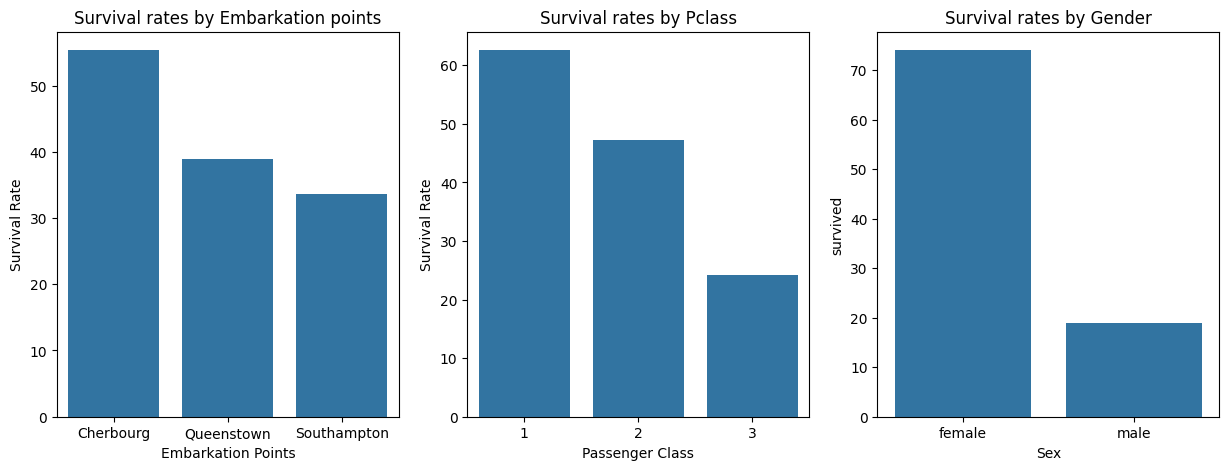

'\n1. Survival rates by Embarkation points\n   --> There were higher survival rates of passengeres embarked from Cherbourg and less survival rate from Southampton.\n\n2. Survival rates by Pclass\n   --> Passengers how paid higher had higher survival rates as that of class-2 and class-3\n\n3. Survival rates by Gender\n   --> Female passengers had higher survival rates than male passengers as females and children are evacuated first.\n'

In [26]:
# Compare survival rates by embarkation point or class

def survived(value):
  percent = (value.sum() / value.count()) * 100
  return percent

filtered = titanic[['Embarked', 'Survived', 'Pclass', 'Sex']]

filtered_data = filtered.groupby('Embarked').agg({'Survived' : survived}).reset_index()
filtered_data_Pclass = filtered.groupby('Pclass').agg({'Survived' : survived}).reset_index()
filtered_data_gender = filtered.groupby('Sex').agg({'Survived' : survived}).reset_index()
filtered_data, filtered_data_Pclass

fig, ax = plt.subplots(1, 3, figsize = (15,5))
filtered_data, sns.barplot(x='Embarked', y='Survived', data = filtered_data, ax=ax[0])
ax[0].set_title('Survival rates by Embarkation points')
ax[0].set_xlabel('Embarkation Points')
ax[0].set_ylabel('Survival Rate')

sns.barplot(data = filtered_data_Pclass, x = 'Pclass', y = 'Survived', ax=ax[1])
ax[1].set_title('Survival rates by Pclass')
ax[1].set_xlabel('Passenger Class')
ax[1].set_ylabel('Survival Rate')

sns.barplot(data = filtered_data_gender, x = "Sex", y = 'Survived', ax = ax[2])
ax[2].set_title('Survival rates by Gender')
ax[2].set_xlabel('Sex')
ax[2].set_ylabel('survived')
plt.show()


'''
1. Survival rates by Embarkation points
   --> There were higher survival rates of passengeres embarked from Cherbourg and less survival rate from Southampton.

2. Survival rates by Pclass
   --> Passengers how paid higher had higher survival rates as that of class-2 and class-3

3. Survival rates by Gender
   --> Female passengers had higher survival rates than male passengers as females and children are evacuated first.
'''

In [27]:
filtered_data = filtered.groupby('Embarked').agg({'Survived' : survived}).reset_index()
filtered_data_Pclass = filtered.groupby('Pclass').agg({'Survived' : survived}).reset_index()
filtered_data_gender = filtered.groupby('Sex').agg({'Survived' : survived}).reset_index()

# fig1 = px.bar(filtered_data, x='Embarked', y='Survived', title='Survival Rates by Embarkation Points', labels={'Survived':'Survival Rate'})
# fig2 = px.bar(filtered_data_Pclass, x='Pclass', y='Survived', title='Survival Rates by Pclass', labels={'Pclass':'Passenger Class'})
# fig2 = px.bar(filtered_data_gender, x='Sex', y='Survived', title='Survival Rates by gender', labels={'Sex':'Sex', 'Survived':'Survived'})

# fig1.update_layout(width=500, height=400)
# fig2.update_layout(width=500, height=400)
# fig2.update_layout(width=500, height=400)

# fig1.show()
# fig2.show()
# fig2.show()

fig = make_subplots(rows=1, cols=3, subplot_titles=('Embarkation Points', 'Pclass', 'Gender'))

fig.add_trace(go.Bar(x=filtered_data['Embarked'], y=filtered_data['Survived'], name='Embarked'), row=1, col=1)
fig.add_trace(go.Bar(x=filtered_data_Pclass['Pclass'], y=filtered_data_Pclass['Survived'], name=' Pclass'), row=1, col=2)
fig.add_trace(go.Bar(x=filtered_data_gender['Sex'], y=filtered_data_gender['Survived'], name='Sex'), row=1, col=3)

fig.update_layout(height=400, width=1200, showlegend=True)
fig.show()


In [28]:
# Counting total number of passengers embarked, survived and survival rates out of the total number of passengers from the respective embarkation points.
embarking_data = titanic.groupby('Embarked').agg({'Embarked':'count', 'Survived':'sum'})
embarking_data.columns = ['Total_Passenger', 'Survived']
embarking_data['Survival_Rate'] = (embarking_data['Survived'] /embarking_data['Total_Passenger']) * 100
embarking_data.reset_index()

,Embarked,Total_Passenger,Survived,Survival_Rate
0,Cherbourg,168,93,55.357143
1,Queenstown,77,30,38.961039
2,Southampton,644,217,33.695652


In [29]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   889 non-null    int64  
 1   Survived      889 non-null    int64  
 2   Pclass        889 non-null    int64  
 3   Name          889 non-null    object 
 4   Sex           889 non-null    object 
 5   Age           889 non-null    int64  
 6   SibSp         889 non-null    int64  
 7   Parch         889 non-null    int64  
 8   Ticket        889 non-null    object 
 9   Fare          889 non-null    float64
 10  Embarked      889 non-null    object 
 11  Survived_str  889 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 90.3+ KB


In [30]:
# Check correlations and visualize relationships:
numeric = titanic.select_dtypes(include = 'number')
numeric.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.030842,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.072695,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,-0.331685,0.081656,0.016824,-0.548193
Age,0.030842,-0.072695,-0.331685,1.000000,-0.231992,-0.175770,0.090885
SibSp,-0.057686,-0.034040,0.081656,-0.231992,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,-0.175770,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.090885,0.160887,0.217532,1.000000


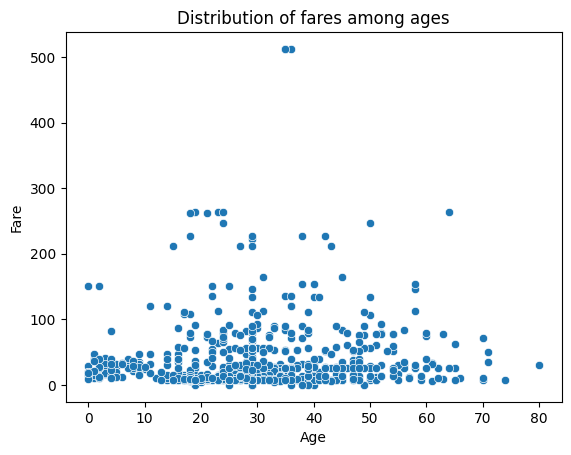

'\n1. Distribution of fares among ages\n   --> Maximum fare is distributed between the range of 0 to 60 that too between the age group from 10-50.\n'

In [31]:
sns.scatterplot(data = titanic, x = 'Age', y = 'Fare')
plt.title('Distribution of fares among ages')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# Using Plotly
fig = px.scatter(titanic, x = 'Age', y = 'Fare', color = 'Sex')
fig.show()

'''
1. Distribution of fares among ages
   --> Maximum fare is distributed between the range of 0 to 60 that too between the age group from 10-50.
'''

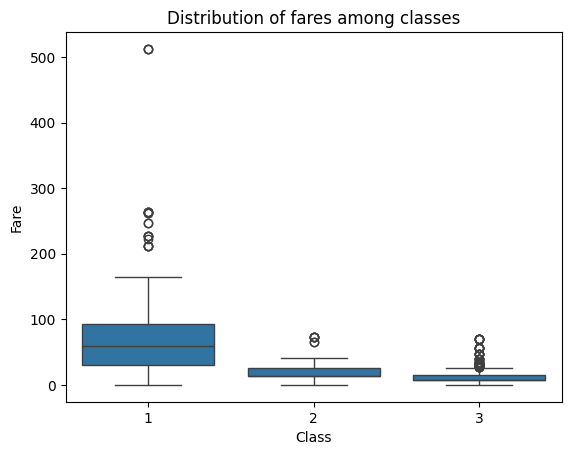

'\n1. Distribution of Fare among different classes\n   --> There is a huge difference between the fare paid by 1st class passengers and other two classes.\n'

In [32]:
# Distribution of Fare among different classes
sns.boxplot(data = titanic, x = 'Pclass', y = 'Fare')
plt.title('Distribution of fares among classes')
plt.xlabel('Class')
plt.ylabel('Fare')
plt.show()

# Using Plotly
fig = px.scatter(titanic, x = 'Pclass', y = 'Fare', color = 'Sex')
fig.update_layout(width=600, height=400)
fig.show()

'''
1. Distribution of Fare among different classes
   --> There is a huge difference between the fare paid by 1st class passengers and other two classes.
'''

In [33]:
# outliers detected
titanic.loc[titanic['Fare'] > 500, ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived_str
258,259,1,1,"Ward, Miss. Anna",female,35,0,0,PC 17755,512.3292,Cherbourg,Yes
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36,0,1,PC 17755,512.3292,Cherbourg,Yes
737,738,1,1,"Lesurer, Mr. Gustave J",male,35,0,0,PC 17755,512.3292,Cherbourg,Yes


In [34]:
ticket = titanic['Ticket'].unique()
len(ticket), titanic.shape

(680, (889, 12))

In [35]:
titanic.loc[titanic['Ticket'] == "PC 17755",]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived_str
258,259,1,1,"Ward, Miss. Anna",female,35,0,0,PC 17755,512.3292,Cherbourg,Yes
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36,0,1,PC 17755,512.3292,Cherbourg,Yes
737,738,1,1,"Lesurer, Mr. Gustave J",male,35,0,0,PC 17755,512.3292,Cherbourg,Yes


In [36]:
#  Variable Engineering
titanic['Family Size'] = titanic['Parch'] + titanic['SibSp'] + 1
titanic['Family Size']

,Family Size
0,2
1,2
2,1
3,2
4,1
...,...
886,1
887,1
888,4
889,1


# Insights



1. AGE DISTRIBUTION
   --> There were higher number of passengers of the age group between 17-37
   --> Count of the passengers of the age group between 27-29 was the highest.

2. FARE AMONG SEX
   --> Male :- Collection of male fare was higher than female.
   --> Female :- Collection of female fare was less than male.

3. Onboard Sex
   --> There were more males onboarded than females.

4. Survival rates by Embarkation points
   --> There were higher survival rates of passengeres embarked from Cherbourg and less survival rate from Southampton.

5. Survival rates by Pclass
   --> Passengers how paid higher had higher survival rates as that of class-2 and class-3

6. Survival rates by Gender
   --> Female passengers had higher survival rates than male passengers as females and children are evacuated first.

7. Distribution of Fare among different classes
   --> First-class passengers had the highest survival rates, followed by second-class. Third-class passengers had the lowest survival rates.

8. Distribution of fares among ages
   --> Maximum fare is distributed between the range of 0 to 60 that too between the age group from 10-50.

